In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale
%matplotlib inline

In [58]:
dfm = pd.read_csv('song_cluster.csv')
df = dfm[['name','artists', 'cluster']].copy()
grouped = df.groupby(df.cluster) 

data = df.values

In [60]:
grouped = dfm.groupby(dfm.cluster) 
df_new = grouped.get_group(dfm.loc[0].cluster).copy()
df_new.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
0,0.995,['Carl Woitschach'],0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.779,1928,34
37,0.994,['Francisco Canaro'],0.854,200213,0.151,0,6aNewFey3lEHDerGgy3rYN,0.371,4,0.1590,-11.163,0,Che Bouhier - Instrumental (Remasterizado),0,1928-09-16,0.1370,110.331,0.781,1928,34
43,0.995,['Francisco Canaro'],0.729,174720,0.191,0,6hcPbniXegOud4FNv8Efxz,0.455,4,0.1030,-15.313,0,Timbero - Instrumental (Remasterizado),0,1928-09-17,0.1080,112.565,0.902,1928,34
53,0.993,"['Francisco Canaro', 'Charlo']",0.836,194000,0.207,0,6kfj3G8mZQH4n530vJen6L,0.522,7,0.3210,-9.540,1,"Dentra, No Llores - Remasterizado",0,1928-10-03,0.1520,112.369,0.595,1928,34
63,0.991,['Francisco Canaro'],0.808,194413,0.215,0,6p5vkrnb0SdBxqHXNPn8Zs,0.524,9,0.0906,-12.205,1,La Cabeza del Italiano - Instrumental (Remaste...,0,1928-09-17,0.0851,110.894,0.866,1928,34


In [61]:
mdf = df_new[['acousticness','energy','loudness', 'year', 'popularity']].copy()

In [68]:
mdf = df_new[['year', 'popularity']].copy()

In [69]:
mdf.columns

Index(['year', 'popularity'], dtype='object')

In [70]:
for i in mdf.columns:
    mdf[i] = scale(mdf[i])
df.head()

,name,artists,cluster
0,Singende Bataillone 1. Teil,['Carl Woitschach'],34
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",63
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],13
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],74
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",6


In [71]:
clusterNum = 10
k_means = KMeans(n_clusters = clusterNum, n_init = 5)
k_means.fit(mdf)
labels = k_means.labels_
print(labels)

[1 1 1 ... 6 9 9]


In [72]:
df_new["cluster"] = labels
df_new.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
0,0.995,['Carl Woitschach'],0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.779,1928,1
37,0.994,['Francisco Canaro'],0.854,200213,0.151,0,6aNewFey3lEHDerGgy3rYN,0.371,4,0.1590,-11.163,0,Che Bouhier - Instrumental (Remasterizado),0,1928-09-16,0.1370,110.331,0.781,1928,1
43,0.995,['Francisco Canaro'],0.729,174720,0.191,0,6hcPbniXegOud4FNv8Efxz,0.455,4,0.1030,-15.313,0,Timbero - Instrumental (Remasterizado),0,1928-09-17,0.1080,112.565,0.902,1928,1
53,0.993,"['Francisco Canaro', 'Charlo']",0.836,194000,0.207,0,6kfj3G8mZQH4n530vJen6L,0.522,7,0.3210,-9.540,1,"Dentra, No Llores - Remasterizado",0,1928-10-03,0.1520,112.369,0.595,1928,1
63,0.991,['Francisco Canaro'],0.808,194413,0.215,0,6p5vkrnb0SdBxqHXNPn8Zs,0.524,9,0.0906,-12.205,1,La Cabeza del Italiano - Instrumental (Remaste...,0,1928-09-17,0.0851,110.894,0.866,1928,1


In [73]:
df_new.groupby('cluster').mean()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
cluster,,,,,,,,,,,,,,,
0,0.962982,0.631466,186639.153846,0.309867,0.0,0.438249,5.334842,0.195620,-10.784638,0.619910,0.117647,0.180794,112.155679,0.737222,1949.407240
1,0.979690,0.693343,180804.302239,0.306151,0.0,0.436981,5.339552,0.203122,-10.230836,0.708955,0.104478,0.098535,120.149925,0.752466,1929.063433
2,0.880462,0.617923,197072.538462,0.305615,0.0,0.443923,6.384615,0.179477,-9.873923,0.769231,19.692308,0.048215,115.755385,0.606231,1956.307692
3,0.954426,0.654681,180909.234043,0.284511,0.0,0.424660,4.936170,0.183338,-11.632957,0.787234,5.872340,0.100666,125.803277,0.714128,1926.936170
4,0.975352,0.620718,183507.884259,0.325572,0.0,0.442806,5.708333,0.195190,-10.564995,0.680556,0.083333,0.125020,113.964463,0.745236,1941.976852
5,0.925600,0.678267,178271.066667,0.300200,0.0,0.448067,4.733333,0.155913,-11.252867,0.600000,20.533333,0.071733,125.001467,0.738400,1927.866667
6,0.860517,0.632466,241420.672414,0.362259,0.0,0.434828,4.810345,0.196834,-11.102655,0.706897,5.948276,0.074809,117.072034,0.622155,1954.637931
7,0.935222,0.646852,182197.814815,0.326926,0.0,0.413037,6.000000,0.202463,-11.201519,0.814815,12.333333,0.092226,127.493667,0.749481,1933.777778
8,0.946792,0.650840,179917.648000,0.334761,0.0,0.436760,4.832000,0.191021,-10.758088,0.736000,0.776000,0.103638,120.533392,0.742208,1935.832000


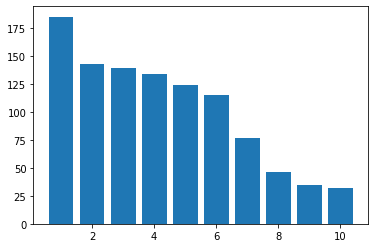

In [67]:
x = plt.bar([i for i in range(1, clusterNum+1)], df_new.cluster.value_counts())

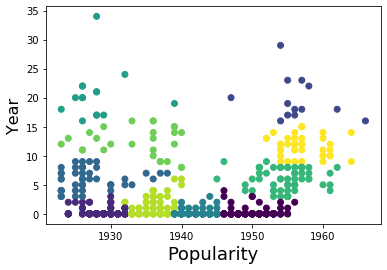

In [76]:
plt.scatter(df_new['year'], df_new['popularity'], c=labels.astype(np.float))
plt.xlabel('Popularity', fontsize=18)
plt.ylabel('Year', fontsize=16)
plt.show()

In [59]:
k = 5

song_index = -1
name_not_found = 0

name_list = list(data[:,0])
while(1):
    if(name_not_found == 0):
        print('Enter a song name: ')
    name = str(input())
    if name in name_list:
        print('Song found, generating recommendations:')
        name_not_found = 0
        song_index = name_list.index(name)
    else:
        name_not_found = 1
        print('Please enter a valid song name:')
        continue
    df_new = grouped.get_group(df.loc[song_index].cluster) 
    df1 = df_new.sample(n = k, random_state=2) 
    for i in range(k):
        print("Recommendation ", i+1, end=": ")
        print(df1.iloc[i][0], " by", df1.iloc[i][1][2:-2])
    print("Do you want to type another song? (Y/N): ")
    ans = 'n' # str(input())
    if(ans=='N' or ans=='n'):
        break
    else:
        continue

Enter a song name: 


 Dream On


Song found, generating recommendations:
Recommendation  1: Contigo - Estar Contigo  by Luis Miguel
Recommendation  2: Love In Any Language  by Sandi Patty
Recommendation  3: The Clansman - 2015 Remaster  by Iron Maiden
Recommendation  4: In a Darkened Room  by Skid Row
Recommendation  5: Meat Is Murder - 2011 Remaster  by The Smiths
Do you want to type another song? (Y/N): 
